# New Section

In [13]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import itertools
import pandas as pd



In [14]:

guess = pd.read_csv('https://raw.githubusercontent.com/samlewis1234/PIC16a/main/valid_guesses.csv')
sol = pd.read_csv('https://raw.githubusercontent.com/samlewis1234/PIC16a/main/valid_solutions.csv')


In [15]:
sol = sol.apply(lambda x: x.astype(str).str.upper())
def split(word):
    '''
    Splits word into individual letters
    
    Args: 
        word: string
          
    Returns: list of letters
    '''
    return [char for char in word]
letters = sol.apply(lambda x:split(x[0]), axis=1,result_type='expand')
letters.columns = ["l1", "l2", "l3", "l4", "l5",]
x = letters

In [16]:
#create a dataframe with the count of each letter at each position
letters_freq = letters.apply(pd.Series.value_counts)

#create a column named sum with the total frequency of each letter
letters_freq['sum'] = letters_freq.sum(1)
letters_freq = letters_freq.fillna(0)
letters_freq
sns.set()

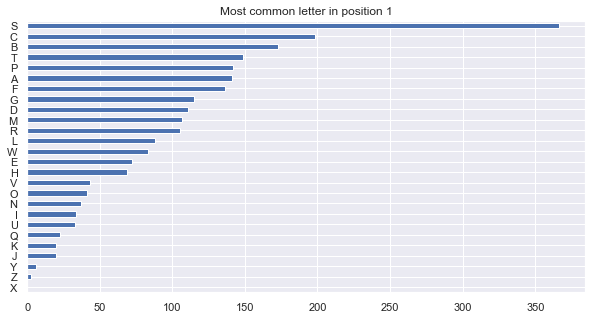

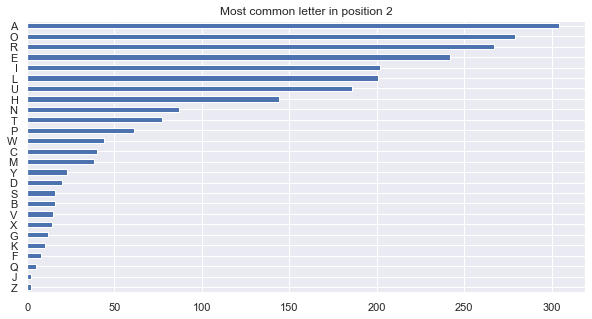

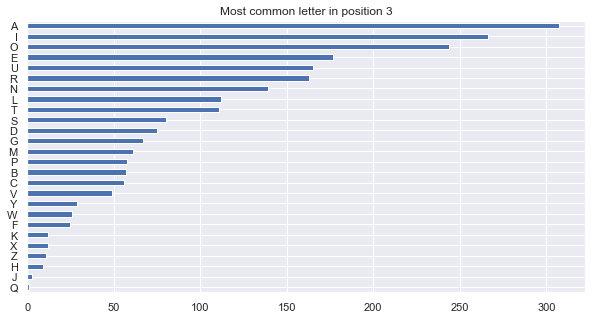

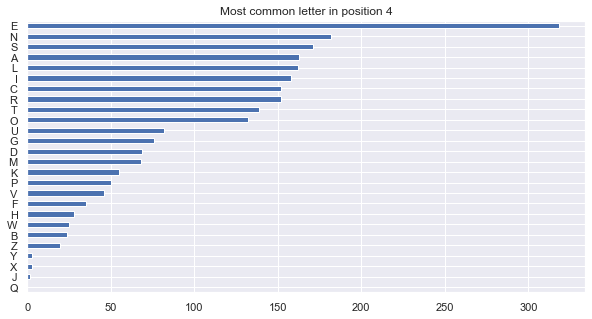

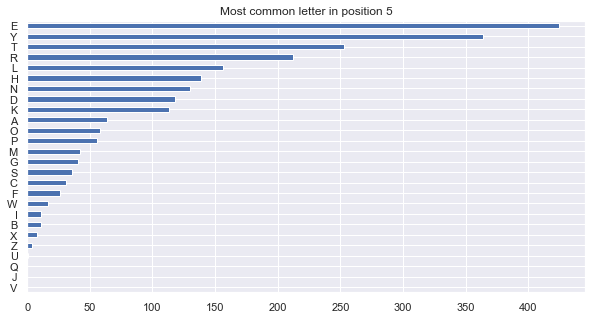

In [17]:
n=1
for column in letters:
    _ = plt.figure(n, figsize=(10,5))
    _ = letters_freq[column].sort_values().plot(kind="barh")
    plt.title("Most common letter in position "+str(n))
    n=n+1
    
plt.show()

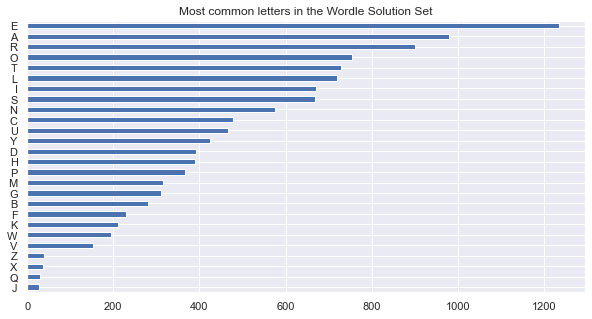

In [18]:
plt.figure(figsize=(10,5))
letters_freq["sum"].sort_values().plot(kind="barh")
plt.title("Most common letters in the Wordle Solution Set")
plt.show()

In [19]:
import operator
def has_both_letters(pair, word):
    '''
    Checks if word has both letters
    
    Args: 
        pair: tuple consisting of two letters
        word: string
          
    Returns: true if word has both letters, false otherwise
    '''
    if pair[1] in word and pair[0] in word:
        return True
    else:
        return False
alphabet_list = list(string.ascii_uppercase)

#create list of answers
answers_list = list(sol['word'])

#simulating permutations of the list in 
#a group of 2
#all unique pairs of letters - 325 (does have double letters since we already tested for those)
pair_list = list(itertools.combinations(alphabet_list,2))


#declare an empty list - list of 2 letter pairs in all the words
sol_pair = []

#add pairs to list
for word in answers_list:
    for pair in pair_list:
      new_list = [has_both_letters(pair, word)]
      if any(new_list):
        sol_pair.append(pair)
            

#create dictionary that contains two letter combos and their frequency
D = {}

for i in sol_pair:
    if i in D:
        D[i] += 1
    else:
        D[i] = 1


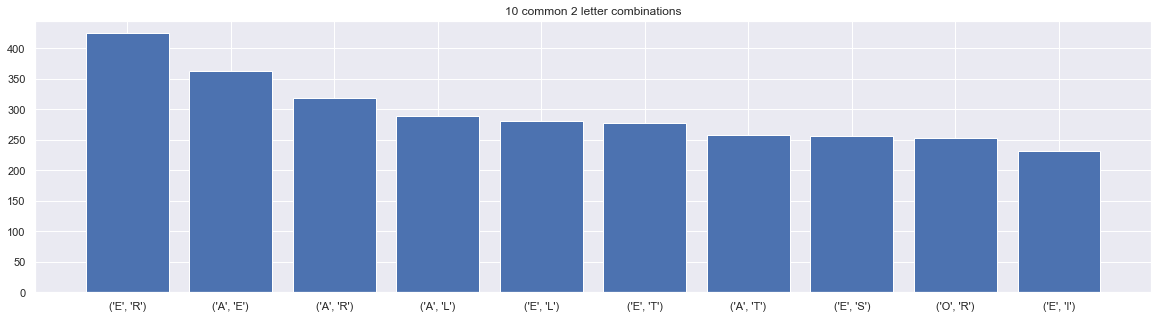

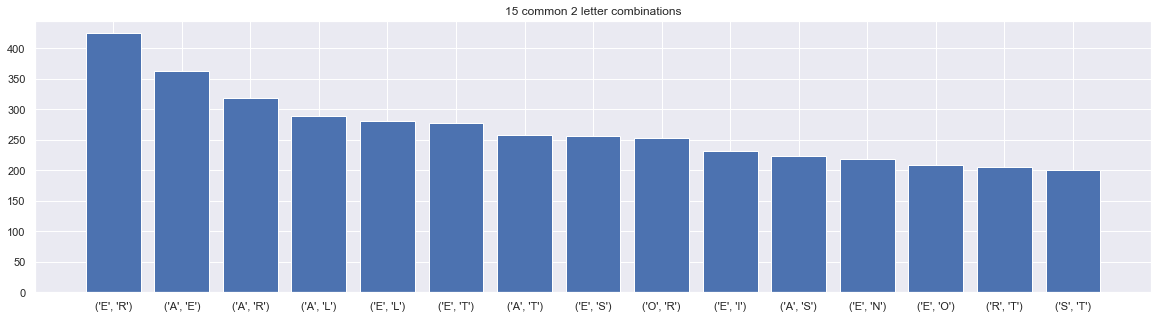

{('E', 'R'): 424, ('A', 'E'): 362, ('A', 'R'): 318, ('A', 'L'): 288, ('E', 'L'): 280, ('E', 'T'): 277, ('A', 'T'): 257, ('E', 'S'): 256, ('O', 'R'): 253, ('E', 'I'): 232}


In [20]:
from dictToOrderedList import dictToOrderedList
    
A = dictToOrderedList(D, reverse = True, n = 10)

A.plot_dict()

A.plot_dict(15)

print(A)

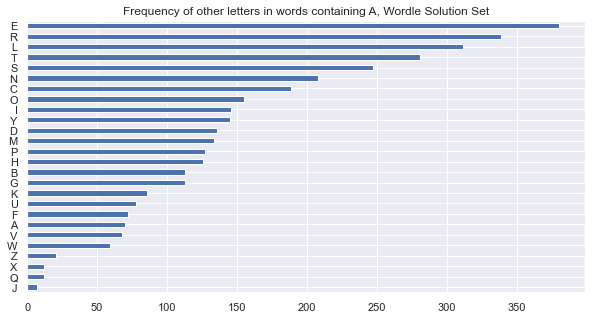

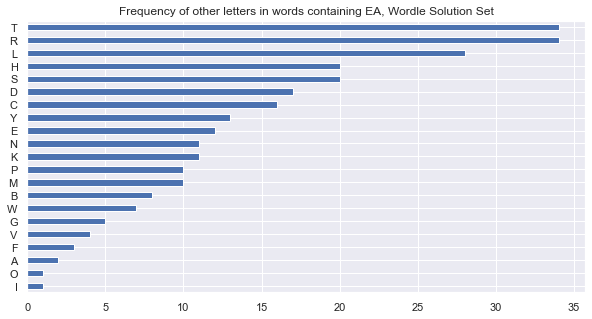

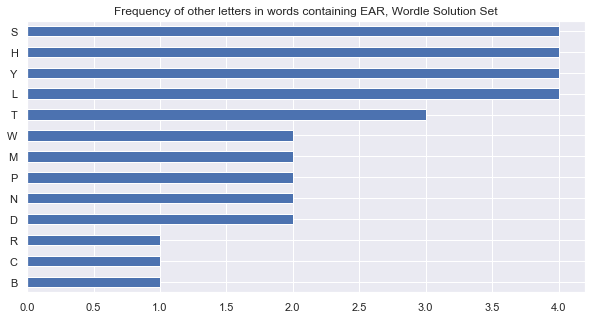

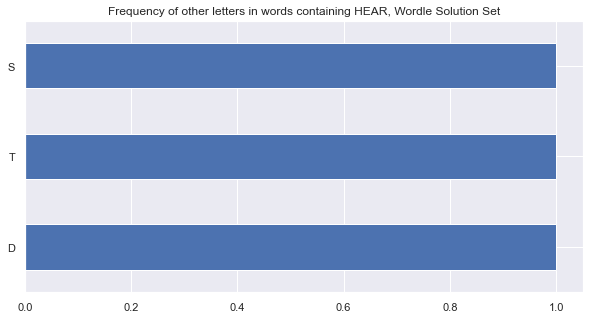

TypeError: No possible solutions containing TTT

In [21]:
from collections import Counter

sol = sol.apply(lambda x: x.astype(str).str.upper())

def withString(charString): #returns list of letters in valid solutions containing charString
  wlList = []
  for i in sol["word"]:
    if charString in i:
      remainingLetters = i.replace(charString, '', 1) #do not include charString itself in wlList (unless it is a repeat)
      for j in remainingLetters:
        wlList.append(j)

  return wlList

def plotByString(charString): #plots bar graph showing information from withString
  df = pd.DataFrame.from_dict(Counter(withString(charString)), orient='index')

  if df.empty: #if no possible words containing charString, raise an exception
    raise TypeError("No possible solutions containing " + charString)
  
  #otherwise, plot the information
  plt.figure(figsize=(10,5))
  df[0].sort_values().plot(kind="barh")
  plt.title("Frequency of other letters in words containing "+str(charString)+", Wordle Solution Set")
  plt.show()

#a few examples, but this can be ran with any given string of uppercase letters
plotByString("A")
plotByString("EA")
plotByString("EAR")
plotByString("HEAR")
plotByString("TTT") #to show an exception